In [18]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e6637d52-213d-47bb-8e03-6bbfb15515ef',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [20]:
import pandas as pd

pd.set_option('display.max_columns', None)


In [36]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980738e+07,1.980738e+07,False,NaN,1,None,None,None,2025-01-08T17:45:00.000Z,93596.952856,6.462864e+10,21.7108,-1.221239,-3.720250,-0.183429,-4.017917,23.078433,55.646632,1.853910e+12,57.0580,1.965536e+12,None,2025-01-08T17:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 18:57:56.364686
1,1027,Ethereum,ETH,ethereum,9808,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204772e+08,1.204772e+08,True,NaN,2,None,None,None,2025-01-08T17:46:00.000Z,3247.608864,3.565072e+10,33.1697,-2.364643,-5.872689,-2.399111,-15.492521,7.519977,36.113412,3.912627e+11,12.0700,3.912627e+11,None,2025-01-08T17:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 18:57:56.364686
2,825,Tether USDt,USDT,tether,111940,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.375909e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-08T17:46:00.000Z,0.999674,1.387765e+11,17.0505,0.011083,-0.017899,0.185303,0.011415,-0.070416,0.081769,1.375460e+11,4.2333,1.413910e+11,None,2025-01-08T17:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 18:57:56.364686
3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-08T17:46:00.000Z,2.257077,7.922737e+09,25.0425,-1.572096,-2.259282,0.550597,-6.114354,311.827312,320.542266,1.296670e+11,4.0001,2.257077e+11,None,2025-01-08T17:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 18:57:56.364686
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440065e+08,1.440065e+08,False,NaN,5,None,None,None,2025-01-08T17:46:00.000Z,686.531591,2.256635e+09,1.8482,-0.606169,-2.715413,-2.455669,-4.666754,11.448637,22.673591,9.886499e+10,3.0499,9.886499e+10,None,2025-01-08T17:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 18:57:56.364686
5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.836528e+08,5.917329e+08,True,NaN,6,None,None,None,2025-01-08T17:46:00.000Z,192.145348,5.135200e+09,32.3833,-2.212955,-6.760776,1.362561,-14.181609,-2.549153,39.144145,9.293163e+10,2.8668,1.136987e+11,None,2025-01-08T17:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 18:57:56.364686
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475408e+11,1.475408e+11,True,NaN,7,None,None,None,2025-01-08T17:46:00.000Z,0.332572,4.890858e+09,16.7498,-2.892083,-8.196413,4.403425,-23.698715,61.179329,216.180345,4.906798e+10,1.5102,4.906798e+10,None,2025-01-08T17:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 18:57:56.364686
7,3408,USDC,USDC,usd-coin,24544,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.548550e+10,4.548550e+10,False,NaN,8,None,None,None,2025-01-08T17:46:00.000Z,0.999981,9.781402e+09,15.8065,0.008464,-0.022200,0.001748,0.006001,0.015728,0.014999,4.548466e+10,1.4031,4.548466e+10,None,2025-01-08T17:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-08 18:57:56.364686
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contra

In [71]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'e6637d52-213d-47bb-8e03-6bbfb15515ef',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df2,df_append])
    df = pd.concat([df, df2], ignore_index=True)

    #if not os.path.isfile(r'C:\Users\ghada\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\ghada\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\ghada\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)


In [67]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API runner completed successfully


KeyboardInterrupt: 

In [69]:
df72 = pd.read_csv(r'C:\Users\ghada\OneDrive\Documents\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.980741e+07,1.980741e+07,False,NaN,1,NaN,NaN,NaN,2025-01-08T18:21:00.000Z,94668.322464,6.538634e+10,21.3032,0.952419,-2.674589,0.771158,-3.443908,24.032878,60.695472,1.875134e+12,56.8683,1.988035e+12,NaN,2025-01-08T18:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
1,1,1027,Ethereum,ETH,ethereum,9808,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204772e+08,1.204772e+08,True,NaN,2,NaN,NaN,NaN,2025-01-08T18:22:00.000Z,3310.743261,3.682255e+10,35.2023,1.826402,-3.685756,-0.557546,-14.027715,8.856235,41.813646,3.988689e+11,12.0701,3.988689e+11,NaN,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
2,2,825,Tether USDt,USDT,tether,111941,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.375909e+11,1.414371e+11,True,NaN,3,NaN,NaN,NaN,2025-01-08T18:21:00.000Z,0.999738,1.406081e+11,16.9899,0.005550,0.018460,0.193731,-0.026480,-0.071600,0.090732,1.375548e+11,4.1691,1.414000e+11,NaN,2025-01-08T18:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 19:22:54.893322
3,3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,NaN,NaN,NaN,2025-01-08T18:22:00.000Z,2.321426,8.159772e+09,26.9612,3.613040,0.667283,2.354349,-3.475730,322.183339,341.366334,1.333637e+11,4.0357,2.321426e+11,NaN,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
4,4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440065e+08,1.440065e+08,False,NaN,5,NaN,NaN,NaN,2025-01-08T18:22:00.000Z,693.278258,2.315381e+09,4.5961,1.270378,-1.635527,-1.375091,-3.798620,12.082933,25.361141,9.983655e+10,3.0211,9.983655e+10,NaN,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,5805,Avalanche,AVAX,avalanche,841,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.104727e+08,4.488090e+08,False,NaN,11,NaN,NaN,NaN,2025-01-08T18:46:00.000Z,37.642195,7.329317e+08,8.0856,1.606747,-6.404018,2.631547,-23.298311,30.128814,48.949115,1.545109e+10,0.4674,2.694235e+10,NaN,2025-01-08T18:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:46:40.909032
71,71,20947,Sui,SUI,sui,510,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",1.000000e+10,3.009569e+09,1.000000e+10,False,NaN,12,NaN,NaN,NaN,2025-01-08T18:46:00.000Z,4.691136,2.196406e+09,38.0471,3.262125,-2.780798,11.260125,16.035354,92.278537,163.749012,1.411830e+10,0.4274,4.691136e+10,NaN,2025-01-08T18:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:46:40.909032
72,72,11419,Toncoin,TON,toncoin,647,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.539709e+09,5.119393e+09,True,NaN,13,NaN,NaN,NaN,2025-01-08T18:46:00.000Z,5.285897,2.788746e+08,23.4013,1.441087,-1.896094,-3.806118,-17.875705,1.321888,4.892004,1.342464e+10,0.4061,2.706058e+10,NaN,2025-01-08T18:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 

In [63]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980741e+07,1.980741e+07,False,NaN,1,None,None,None,2025-01-08T18:21:00.000Z,94668.322464,6.538634e+10,21.3032,0.952419,-2.674589,0.771158,-3.443908,24.032878,60.695472,1.875134e+12,56.8683,1.988035e+12,None,2025-01-08T18:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
1,1027,Ethereum,ETH,ethereum,9808,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204772e+08,1.204772e+08,True,NaN,2,None,None,None,2025-01-08T18:22:00.000Z,3310.743261,3.682255e+10,35.2023,1.826402,-3.685756,-0.557546,-14.027715,8.856235,41.813646,3.988689e+11,12.0701,3.988689e+11,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
2,825,Tether USDt,USDT,tether,111941,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.375909e+11,1.414371e+11,True,NaN,3,None,None,None,2025-01-08T18:21:00.000Z,0.999738,1.406081e+11,16.9899,0.005550,0.018460,0.193731,-0.026480,-0.071600,0.090732,1.375548e+11,4.1691,1.414000e+11,None,2025-01-08T18:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 19:22:54.893322
3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.744905e+10,9.998671e+10,False,NaN,4,None,None,None,2025-01-08T18:22:00.000Z,2.321426,8.159772e+09,26.9612,3.613040,0.667283,2.354349,-3.475730,322.183339,341.366334,1.333637e+11,4.0357,2.321426e+11,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440065e+08,1.440065e+08,False,NaN,5,None,None,None,2025-01-08T18:22:00.000Z,693.278258,2.315381e+09,4.5961,1.270378,-1.635527,-1.375091,-3.798620,12.082933,25.361141,9.983655e+10,3.0211,9.983655e+10,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
5,5426,Solana,SOL,solana,819,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.836523e+08,5.917325e+08,True,NaN,6,None,None,None,2025-01-08T18:22:00.000Z,195.423858,5.201980e+09,32.5892,2.188671,-5.265859,2.815006,-12.988709,-1.591361,43.908606,9.451721e+10,2.8602,1.156386e+11,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
6,74,Dogecoin,DOGE,dogecoin,1142,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.475411e+11,1.475411e+11,True,NaN,7,None,None,None,2025-01-08T18:22:00.000Z,0.339083,4.924594e+09,13.6637,1.614803,-6.488183,6.248390,-22.273561,62.954333,227.315339,5.002871e+10,1.5163,5.002871e+10,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
7,3408,USDC,USDC,usd-coin,24545,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.552102e+10,4.552102e+10,False,NaN,8,None,None,None,2025-01-08T18:22:00.000Z,1.000244,1.038238e+10,21.7617,0.028460,-0.006559,0.032221,0.028997,0.050438,0.015730,4.553214e+10,1.3778,4.553214e+10,None,2025-01-08T18:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-08 19:22:54.893322
8,2010,Cardano,ADA,cardano,1428,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4

In [73]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [75]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11860,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19807409.00000,19807409.00000,False,NaN,1,None,None,None,2025-01-08T18:21:00.000Z,94668.32246,65386343072.06071,21.30320,0.95242,-2.67459,0.77116,-3.44391,24.03288,60.69547,1875134182381.48730,56.86830,1988034771736.73999,None,2025-01-08T18:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
1,1027,Ethereum,ETH,ethereum,9808,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120477156.73077,120477156.73077,True,NaN,2,None,None,None,2025-01-08T18:22:00.000Z,3310.74326,36822553952.92491,35.20230,1.82640,-3.68576,-0.55755,-14.02772,8.85623,41.81365,398868934699.48486,12.07010,398868934699.47998,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
2,825,Tether USDt,USDT,tether,111941,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,137590885948.72330,141437091593.38644,True,NaN,3,None,None,None,2025-01-08T18:21:00.000Z,0.99974,140608078296.44055,16.98990,0.00555,0.01846,0.19373,-0.02648,-0.07160,0.09073,137554813446.18716,4.16910,141400010722.73001,None,2025-01-08T18:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-08 19:22:54.893322
3,52,XRP,XRP,xrp,1497,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57449049415.00000,99986708632.00000,False,NaN,4,None,None,None,2025-01-08T18:22:00.000Z,2.32143,8159771504.62480,26.96120,3.61304,0.66728,2.35435,-3.47573,322.18334,341.36633,133363725978.46684,4.03570,232142615650.73999,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
4,1839,BNB,BNB,bnb,2329,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144006470.53000,144006470.53000,False,NaN,5,None,None,None,2025-01-08T18:22:00.000Z,693.27826,2315381453.85027,4.59610,1.27038,-1.63553,-1.37509,-3.79862,12.08293,25.36114,99836554959.08990,3.02110,99836554959.09000,None,2025-01-08T18:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:22:54.893322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5805,Avalanche,AVAX,avalanche,841,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,410472696.63433,448808996.63433,False,NaN,11,None,None,None,2025-01-08T18:46:00.000Z,37.64220,732931736.82484,8.08560,1.60675,-6.40402,2.63155,-23.29831,30.12881,48.94912,15451093336.12470,0.46740,26942352933.97000,None,2025-01-08T18:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:46:40.909032
71,20947,Sui,SUI,sui,510,2022-07-12T08:03:11.000Z,"[binance-launchpool, coinbase-ventures-portfol...",10000000000.00000,3009569341.53389,10000000000.00000,False,NaN,12,None,None,None,2025-01-08T18:46:00.000Z,4.69114,2196406469.03617,38.04710,3.26213,-2.78080,11.26012,16.03535,92.27854,163.74901,14118299904.13081,0.42740,46911362729.84000,None,2025-01-08T18:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-08 19:46:40.909032
72,11419,Toncoin,TON,toncoin,647,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2539708508.40658,5119393255.20288,True,NaN,13,None,None,None,2025-01-08T18:46:00.000Z,5.28590,278874570.42903,23.

In [77]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.96532,-2.68086,0.60767,-3.59372,23.85956,60.30765
Ethereum,1.98861,-3.64722,-0.72410,-14.07105,8.72117,41.60337
Tether USDt,0.01833,0.01632,0.20346,-0.00790,-0.06274,0.09316
XRP,3.55689,0.93305,2.00835,-3.55872,321.95465,341.13546
BNB,1.26085,-1.57492,-1.43158,-3.80360,12.07420,25.29945
Solana,2.14332,-5.17087,2.58026,-13.02771,-1.65521,43.72411
Dogecoin,1.81470,-5.98905,6.04099,-22.22652,62.81681,227.01778
USDC,0.01569,-0.00247,0.02527,0.01765,0.03783,0.01265
Cardano,2.66059,-7.23424,7.07934,-14.79328,117.42053,186.55526


In [79]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.96532
           quote.USD.percent_change_24h    -2.68086
           quote.USD.percent_change_7d      0.60767
           quote.USD.percent_change_30d    -3.59372
           quote.USD.percent_change_60d    23.85956
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -4.21760
           quote.USD.percent_change_7d      0.32207
           quote.USD.percent_change_30d   -28.57304
           quote.USD.percent_change_60d    10.92005
           quote.USD.percent_change_90d    31.65919
Length: 90, dtype: float64

In [83]:
type(df4)

pandas.core.series.Series

In [85]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.96532
          quote.USD.percent_change_24h  -2.68086
          quote.USD.percent_change_7d    0.60767
          quote.USD.percent_change_30d  -3.59372
          quote.USD.percent_change_60d  23.85956
...                                          ...
Shiba Inu quote.USD.percent_change_24h  -4.21760
          quote.USD.percent_change_7d    0.32207
          quote.USD.percent_change_30d -28.57304
          quote.USD.percent_change_60d  10.92005
          quote.USD.percent_change_90d  31.65919

[90 rows x 1 columns]

In [89]:
df5.count()

values    90
dtype: int64

In [97]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.96532
1,Bitcoin,quote.USD.percent_change_24h,-2.68086
2,Bitcoin,quote.USD.percent_change_7d,0.60767
3,Bitcoin,quote.USD.percent_change_30d,-3.59372
4,Bitcoin,quote.USD.percent_change_60d,23.85956
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-4.21760
86,Shiba Inu,quote.USD.percent_change_7d,0.32207
87,Shiba Inu,quote.USD.percent_change_30d,-28.57304
88,Shiba Inu,quote.USD.percent_change_60d,10.92005


In [103]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.96532
1,Bitcoin,quote.USD.percent_change_24h,-2.68086
2,Bitcoin,quote.USD.percent_change_7d,0.60767
3,Bitcoin,quote.USD.percent_change_30d,-3.59372
4,Bitcoin,quote.USD.percent_change_60d,23.85956
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-4.21760
86,Shiba Inu,quote.USD.percent_change_7d,0.32207
87,Shiba Inu,quote.USD.percent_change_30d,-28.57304
88,Shiba Inu,quote.USD.percent_change_60d,10.92005


In [111]:

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.96532
1,Bitcoin,24h,-2.68086
2,Bitcoin,7d,0.60767
3,Bitcoin,30d,-3.59372
4,Bitcoin,60d,23.85956
...,...,...,...
85,Shiba Inu,24h,-4.21760
86,Shiba Inu,7d,0.32207
87,Shiba Inu,30d,-28.57304
88,Shiba Inu,60d,10.92005


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

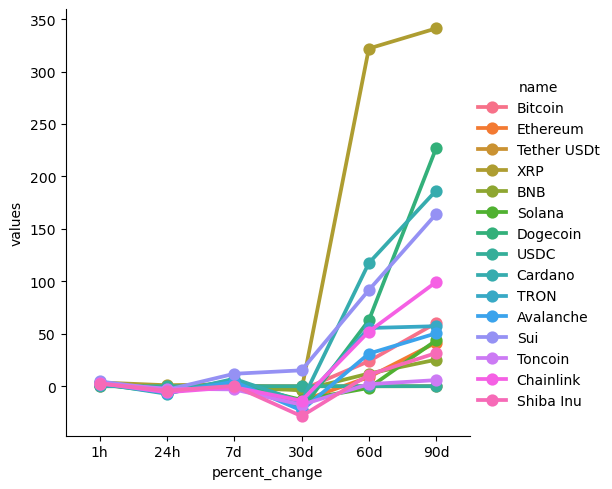

In [113]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [123]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8.query("name == 'Bitcoin'")


,name,quote.USD.price,timestamp
0,Bitcoin,94668.32246,2025-01-08 19:22:54.893322
15,Bitcoin,94668.32246,2025-01-08 19:22:54.893322
30,Bitcoin,94534.51203,2025-01-08 19:24:46.039570
45,Bitcoin,94590.29489,2025-01-08 19:25:46.700356
60,Bitcoin,94341.31932,2025-01-08 19:46:40.909032


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

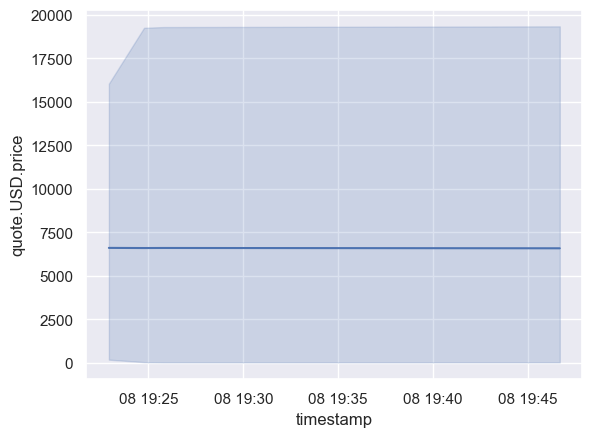

In [127]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)